In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

In [4]:
#importing the weather dataframe
path = r'C:\Users\karim\Documents\machine learning'
X= pd.read_csv(os.path.join(path, 'data', 'prepared Data', 'machine2_weather_clean.csv'))

In [5]:
df_answers = pd.read_csv(os.path.join(path, 'data', 'original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [6]:
X

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,8,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,2,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,4,1.0263,0.98
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,0,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,1.00
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,2,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.85
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,1,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.94


In [15]:
df_answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
#dropping date from df_answers
df_answers.drop(columns=['DATE'],axis=1)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# Reduce answers dataset to BUDAPEST's answers only

answers_MAASTRICHT = df_answers['MAASTRICHT_pleasant_weather']
answers_MAASTRICHT.shape

(22950,)

In [21]:
#create a sample for Belgrade data
MAASTRICHT_list=list(x for x in X.columns if x.find('MAASTRICHT')>=0)
MAASTRICHT_list

['MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max']

In [23]:
weather_MAASTRICHT=X[MAASTRICHT_list]
weather_MAASTRICHT.shape



(22950, 9)

# Reshaping and Splitting

In [25]:
X_=weather_MAASTRICHT
X_.shape

(22950, 9)

In [27]:
y=answers_MAASTRICHT
y.shape

(22950,)

In [29]:
 #Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_,y,random_state = 42)

In [31]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


# Random Forest Model

In [34]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


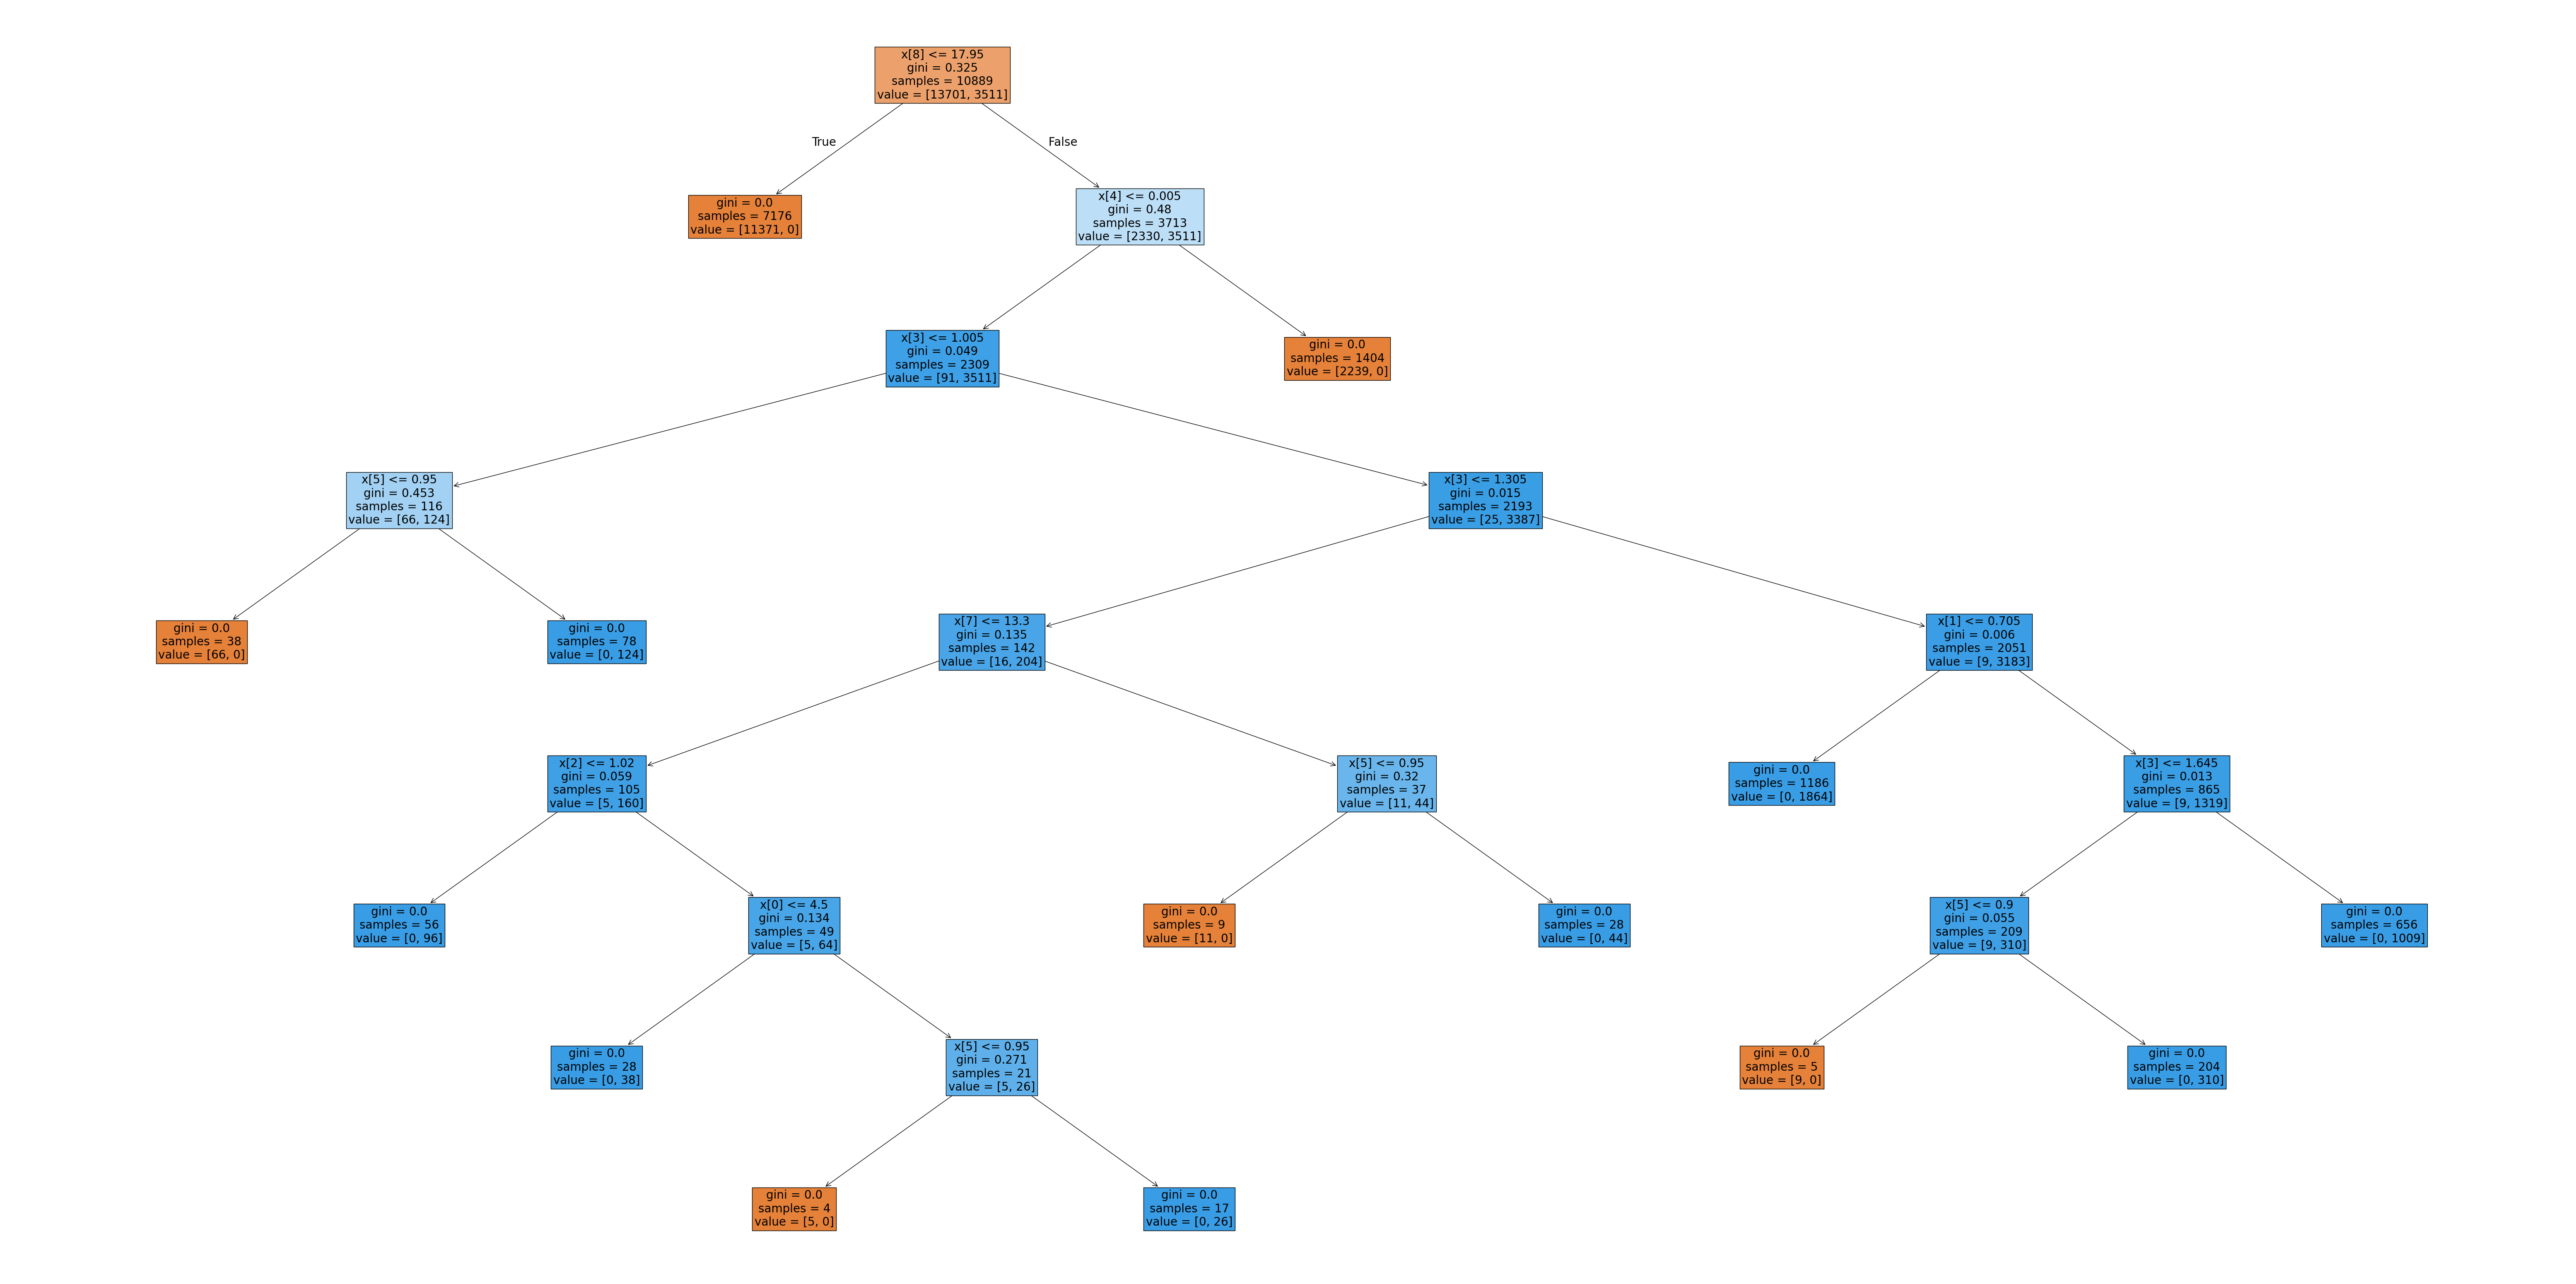

In [38]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

# features inportance

In [40]:
# Make a list (or better, a DataFrame) of feature importances
importances = clf.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                       Feature  Importance
4     MAASTRICHT_precipitation    0.330153
8          MAASTRICHT_temp_max    0.313673
6         MAASTRICHT_temp_mean    0.127847
5          MAASTRICHT_sunshine    0.067746
3  MAASTRICHT_global_radiation    0.064557
0       MAASTRICHT_cloud_cover    0.029824
1          MAASTRICHT_humidity    0.027328
7          MAASTRICHT_temp_min    0.025351
2          MAASTRICHT_pressure    0.013521


In [42]:
importances.shape

(9,)

In [44]:
#reshapinf feature_importance list
X_reshaped = importances.reshape(1,9,1)
print(X_reshaped.shape)

(1, 9, 1)


In [46]:
#collapsing the shape in one observation
collapsed = np.sum(X_reshaped[0], axis=1)
print(collapsed.shape)

(9,)


In [50]:
MAASTRICHT_features = ['_'.join(col.split('_')[1:]) for col in X_]
MAASTRICHT_features

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

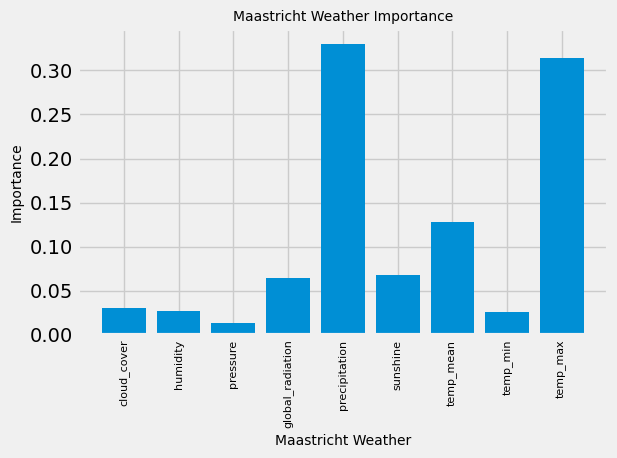

In [54]:
#Plotting 
plt.style.use('fivethirtyeight')

x_values = list(range(len(collapsed)))

plt.bar(MAASTRICHT_features, collapsed)
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Importance',fontsize=10)
plt.xlabel('Maastricht Weather', fontsize=10)
plt.title('Maastricht Weather Importance', fontsize=10)
plt.tight_layout()
plt.show()